In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
import seaborn as sns

In [4]:
data = pd.read_csv(r'C:\Users\user\Documents\archive\ToMini2.csv', index_col=0)
data

,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Uo Units,Potential Duplicate,Assay Description,Assay Type,BAO Format ID,BAO Label,Source Description,Value
1,364.46,0.0,3.49,3,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,IC50,'=',40.0,nM,UO_0000065,0,In vitro inhibitory activity against Prostagla...,B,BAO_0000221,tissue-based format,Scientific Literature,0.04
2,372.88,0.0,4.43,34,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,IC50,'=',1700.0,nM,UO_0000065,0,Inhibition of Prostaglandin G/H synthase 2 was...,B,BAO_0000357,single protein format,Scientific Literature,1.70
3,413.90,1.0,5.19,5,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,IC50,'=',50.0,nM,UO_0000065,0,In vitro inhibitory activity against human Pro...,B,BAO_0000357,single protein format,Scientific Literature,0.05
4,357.79,0.0,3.93,Indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,IC50,'<',200.0,nM,UO_0000065,0,Inhibition of Prostaglandin G/H synthase 2 in ...,B,BAO_0000219,cell-based format,Scientific Literature,200.00
5,390.46,0.0,4.25,21,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,IC50,'>',10000.0,nM,UO_0000065,0,Inhibitory activity against human recombinant ...,B,BAO_0000219,cell-based format,Scientific Literature,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,381.38,0.0,3.51,Celecoxib,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,IC50,'=',40.0,nM,UO_0000065,1,Inhibition of recombinant human COX-2,B,BAO_0000357,single protein format,Scientific Literature,0.04
14091,206.28,0.0,3.07,Motrin,CC(C)Cc1ccc(C(C)C(=O)O)cc1,IC50,'=',370000.0,nM,UO_0000065,0,Inhibition of COX-2 (unknown origin) by human ...,B,BAO_0000357,single protein format,Scientific Literature,370.00
14107,296.15,0.0,4.36,DIF,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,IC50,'=',1100.0,nM,UO_0000065,0,Inhibition of COX-2 (unknown origin) at 10 uM,B,BAO_0000357,single protein format,Scientific Literature,1.10
14125,261.71,0.0,4.09,Tolfenamic acid,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,IC50,'=',880.0,nM,UO_0000065,0,Inhibition of human recombinant COX-2 using ar...,B,BAO_0000357,single protein format,Scientific Literature,0.88


# Теперь 1-d дескрипторы


In [5]:
from rdkit.Chem import AllChem, MACCSkeys, DataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

In [8]:
data['Smiles'].values

array(['CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1',
       'CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1',
       'CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)cc12', ...,
       'O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl', 'Cc1c(Cl)cccc1Nc1ccccc1C(=O)O',
       'CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1'], shape=(6925,), dtype=object)

In [12]:
import rdkit
def get_descr_value(mol, descr_func): # Берем молекулу и функцию для дескрипторов
    out_arr = np.zeros((1,), dtype=int)
    descriptor = descr_func(mol)
    if isinstance(descriptor, rdkit.DataStructs.cDataStructs.ExplicitBitVect):
        DataStructs.ConvertToNumpyArray(descriptor, out_arr) # Фингерпринты
        return out_arr
    return descriptor

In [13]:
data_copy = data
new_col = []
for i in data['Smiles'].values:
    new_col.append(get_descr_value(Chem.MolFromSmiles(i), AllChem.GetMACCSKeysFingerprint))
data_copy['Mol_obj'] = new_col
data_copy

,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Uo Units,Potential Duplicate,Assay Description,Assay Type,BAO Format ID,BAO Label,Source Description,Value,Mol_obj
1,364.46,0.0,3.49,3,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,IC50,'=',40.0,nM,UO_0000065,0,In vitro inhibitory activity against Prostagla...,B,BAO_0000221,tissue-based format,Scientific Literature,0.04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,372.88,0.0,4.43,34,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,IC50,'=',1700.0,nM,UO_0000065,0,Inhibition of Prostaglandin G/H synthase 2 was...,B,BAO_0000357,single protein format,Scientific Literature,1.70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,413.90,1.0,5.19,5,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,IC50,'=',50.0,nM,UO_0000065,0,In vitro inhibitory activity against human Pro...,B,BAO_0000357,single protein format,Scientific Literature,0.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,357.79,0.0,3.93,Indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,IC50,'<',200.0,nM,UO_0000065,0,Inhibition of Prostaglandin G/H synthase 2 in ...,B,BAO_0000219,cell-based format,Scientific Literature,200.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,390.46,0.0,4.25,21,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,IC50,'>',10000.0,nM,UO_0000065,0,Inhibitory activity against human recombinant ...,B,BAO_0000219,cell-based format,Scientific Literature,10.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,381.38,0.0,3.51,Celecoxib,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,IC50,'=',40.0,nM,UO_0000065,1,Inhibition of recombinant human COX-2,B,BAO_0000357,single protein format,Scientific Literature,0.04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14091,206.28,0.0,3.07,Motrin,CC(C)Cc1ccc(C(C)C(=O)O)cc1,IC50,'=',370000.0,nM,UO_0000065,0,Inhibition of COX-2 (unknown origin) by human ...,B,BAO_0000357,single protein format,Scientific Literature,370.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14107,296.15,0.0,4.36,DIF,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,IC50,'=',1100.0,nM,UO_0000065,0,Inhibition of COX-2 (unknown origin) at 10 uM,B,BAO_0000357,single protein format,Scientific Literature,1.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
14125,261.71,0.0,4.09,Tolfenamic acid,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,IC50,'=',880.0,nM,UO_0000065,0,Inhibition of human recombinant COX-2 using ar...,B,BAO_0000357,single protein format,Scientific Literature,0.88,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Удобнее в виде номера принта и числа

In [17]:
new2_col=[]
for arr in data_copy['Mol_obj']:
    fingers =[]
    for i in range(len(arr)):
        
        if arr[i]:
            fingers.append([i, arr[i]])
    new2_col.append(fingers)
data_copy['FINGERPRINTS'] = new2_col
data_copy


,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,Uo Units,Potential Duplicate,Assay Description,Assay Type,BAO Format ID,BAO Label,Source Description,Value,Mol_obj,FINGERPRINTS
1,364.46,0.0,3.49,3,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,IC50,'=',40.0,nM,UO_0000065,0,In vitro inhibitory activity against Prostagla...,B,BAO_0000221,tissue-based format,Scientific Literature,0.04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[50, 1], [51, 1], [55, 1], [57, 1], [58, 1], ..."
2,372.88,0.0,4.43,34,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,IC50,'=',1700.0,nM,UO_0000065,0,Inhibition of Prostaglandin G/H synthase 2 was...,B,BAO_0000357,single protein format,Scientific Literature,1.70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[51, 1], [55, 1], [58, 1], [59, 1], [60, 1], ..."
3,413.90,1.0,5.19,5,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,IC50,'=',50.0,nM,UO_0000065,0,In vitro inhibitory activity against human Pro...,B,BAO_0000357,single protein format,Scientific Literature,0.05,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[65, 1], [75, 1], [83, 1], [85, 1], [87, 1], ..."
4,357.79,0.0,3.93,Indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,IC50,'<',200.0,nM,UO_0000065,0,Inhibition of Prostaglandin G/H synthase 2 in ...,B,BAO_0000219,cell-based format,Scientific Literature,200.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[65, 1], [75, 1], [83, 1], [85, 1], [87, 1], ..."
5,390.46,0.0,4.25,21,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,IC50,'>',10000.0,nM,UO_0000065,0,Inhibitory activity against human recombinant ...,B,BAO_0000219,cell-based format,Scientific Literature,10.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[36, 1], [42, 1], [51, 1], [55, 1], [58, 1], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,381.38,0.0,3.51,Celecoxib,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,IC50,'=',40.0,nM,UO_0000065,1,Inhibition of recombinant human COX-2,B,BAO_0000357,single protein format,Scientific Literature,0.04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[32, 1], [33, 1], [42, 1], [51, 1], [52, 1], ..."
14091,206.28,0.0,3.07,Motrin,CC(C)Cc1ccc(C(C)C(=O)O)cc1,IC50,'=',370000.0,nM,UO_0000065,0,Inhibition of COX-2 (unknown origin) by human ...,B,BAO_0000357,single protein format,Scientific Literature,370.00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[74, 1], [115, 1], [123, 1], [139, 1], [141, ..."
14107,296.15,0.0,4.36,DIF,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,IC50,'=',1100.0,nM,UO_0000065,0,Inhibition of COX-2 (unknown origin) at 10 uM,B,BAO_0000357,single protein format,Scientific Literature,1.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[87, 1], [90, 1], [103, 1], [104, 1], [107, 1..."
14125,261.71,0.0,4.09,Tolfenamic acid,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,IC50,'=',880.0,nM,UO_0000065,0,Inhibition of human recombinant COX-2 using ar...,B,BAO_0000357,single protein format,Scientific Literature,0.88,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[53, 1], [87, 1], [97, 1], [103, 1], [107, 1]..."


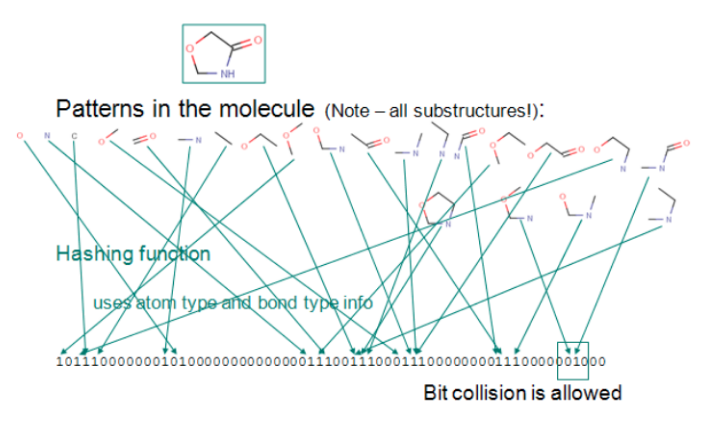

In [ ]:
#теперь в FingerPrint их номер и число типо


    # MACCS keys
# smartsPatts = {
#   1: ('?', 0),  # ISOTOPE
#   #2:('[#104,#105,#106,#107,#106,#109,#110,#111,#112]',0),  # atomic num >103 Not complete
#   2: ('[#104]', 0),  # limit the above def'n since the RDKit only accepts up to #104
#   3: ('[#32,#33,#34,#50,#51,#52,#82,#83,#84]', 0),  # Group IVa,Va,VIa Rows 4-6
#   4: ('[Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr]', 0),  # actinide
#   5: ('[Sc,Ti,Y,Zr,Hf]', 0),  # Group IIIB,IVB (Sc...)
#   6: ('[La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu]', 0),  # Lanthanide
#   7: ('[V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re]', 0),  # Group VB,VIB,VIIB
#   8: ('[!#6;!#1]1~*~*~*~1', 0),  # QAAA@1
#   9: ('[Fe,Co,Ni,Ru,Rh,Pd,Os,Ir,Pt]', 0),  # Group VIII (Fe...)
#   10: ('[Be,Mg,Ca,Sr,Ba,Ra]', 0),  # Group IIa (Alkaline earth)
#       ...
#   157: ('[#6]-[#8]', 0),  # C-O
#   158: ('[#6]-[#7]', 0),  # C-N
#   159: ('[#8]', 1),  # O>1
#   160: ('[C;H3,H4]', 0),  #CH3
#   161: ('[#7]', 0),  # N
#   162: ('a', 0),  # Aromatic
#   163: ('*1~*~*~*~*~*~1', 0),  # 6M Ring
#   164: ('[#8]', 0),  # O
#   165: ('[R]', 0),  # Ring
#   166: ('?', 0),  # Fragments  FIX: this can't be done in SMARTS
# }

# Вдохновленный код по созданию датафрейма дескрипторов

https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html

In [25]:
from rdkit.Chem import Descriptors
def get_all_descriptors(mol, MissingValue = None):
    res = {}

    for name, function in Descriptors._descList:
        try:
            value = function(mol)
        except:
            import traceback
            traceback.print_exc()
            val = MissingValue
        res[name] = value
    return res


In [ ]:
mol_object = []
for i in data['Smiles']:
    mol_object.append(Chem.MolFromSmiles(i))
    

type(mol_object[45])

rdkit.Chem.rdchem.Mol

In [28]:
dat = [get_all_descriptors(mol) for mol in mol_object]

In [32]:
data['Smiles']

1          CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1
2           CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1
3        CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...
4           COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
5        CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1
                               ...                        
14087    Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...
14091                           CC(C)Cc1ccc(C(C)C(=O)O)cc1
14107                       O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl
14125                         Cc1c(Cl)cccc1Nc1ccccc1C(=O)O
14147                    CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1
Name: Smiles, Length: 6925, dtype: object

In [33]:
df=  pd.DataFrame(dat)
df['Smiles'] = data['Smiles'].values
df['Values'] = data['Standard Value'].values
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Smiles,Values
0,12.372552,12.372552,0.037493,-3.264341,0.765113,21.320000,364.463,340.271,364.134445,136,...,1,0,0,0,0,0,0,0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,40.0
1,11.641862,11.641862,0.279401,-3.231616,0.679285,11.480000,372.877,355.741,372.069926,128,...,1,0,0,0,0,0,0,0,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,1700.0
2,13.229344,13.229344,0.097334,-0.303369,0.394970,10.896552,413.901,389.709,413.139386,152,...,0,0,0,0,0,0,1,0,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,50.0
3,12.987203,12.987203,0.170239,-0.954711,0.767807,10.840000,357.793,341.665,357.076786,128,...,0,0,0,0,0,0,0,0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,200.0
4,13.270260,13.270260,0.140080,-3.296291,0.706877,11.461538,390.457,375.337,390.039579,134,...,1,0,0,0,0,1,0,0,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,13.125484,13.125484,0.137651,-4.605917,0.754105,12.346154,381.379,367.267,381.075882,136,...,0,0,0,0,0,0,0,0,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,40.0
6921,10.762425,10.762425,0.418426,-0.771658,0.821600,12.800000,206.285,188.141,206.130680,82,...,0,0,0,0,0,0,0,0,CC(C)Cc1ccc(C(C)C(=O)O)cc1,370000.0
6922,10.827338,10.827338,0.064241,-0.889347,0.880729,10.210526,296.153,285.065,295.016684,98,...,0,0,0,0,0,0,0,0,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,1100.0
6923,11.097769,11.097769,0.233218,-0.960388,0.874855,10.111111,261.708,249.612,261.055656,92,...,0,0,0,0,0,0,0,0,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,880.0


Теперь нулевую дисп удалить и пропуски

In [36]:
df_exp = df
df_exp = df_exp[df_exp[df_exp.columns].notna()]
df_exp

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Smiles,Values
0,12.372552,12.372552,0.037493,-3.264341,0.765113,21.320000,364.463,340.271,364.134445,136,...,1,0,0,0,0,0,0,0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,40.0
1,11.641862,11.641862,0.279401,-3.231616,0.679285,11.480000,372.877,355.741,372.069926,128,...,1,0,0,0,0,0,0,0,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,1700.0
2,13.229344,13.229344,0.097334,-0.303369,0.394970,10.896552,413.901,389.709,413.139386,152,...,0,0,0,0,0,0,1,0,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,50.0
3,12.987203,12.987203,0.170239,-0.954711,0.767807,10.840000,357.793,341.665,357.076786,128,...,0,0,0,0,0,0,0,0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,200.0
4,13.270260,13.270260,0.140080,-3.296291,0.706877,11.461538,390.457,375.337,390.039579,134,...,1,0,0,0,0,1,0,0,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,13.125484,13.125484,0.137651,-4.605917,0.754105,12.346154,381.379,367.267,381.075882,136,...,0,0,0,0,0,0,0,0,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,40.0
6921,10.762425,10.762425,0.418426,-0.771658,0.821600,12.800000,206.285,188.141,206.130680,82,...,0,0,0,0,0,0,0,0,CC(C)Cc1ccc(C(C)C(=O)O)cc1,370000.0
6922,10.827338,10.827338,0.064241,-0.889347,0.880729,10.210526,296.153,285.065,295.016684,98,...,0,0,0,0,0,0,0,0,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,1100.0
6923,11.097769,11.097769,0.233218,-0.960388,0.874855,10.111111,261.708,249.612,261.055656,92,...,0,0,0,0,0,0,0,0,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,880.0


In [37]:
for i in df_exp.columns:
    if df_exp[i].unique().sum() == 1:
        df_exp.drop(i, axis = 1)
df_exp

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Smiles,Values
0,12.372552,12.372552,0.037493,-3.264341,0.765113,21.320000,364.463,340.271,364.134445,136,...,1,0,0,0,0,0,0,0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,40.0
1,11.641862,11.641862,0.279401,-3.231616,0.679285,11.480000,372.877,355.741,372.069926,128,...,1,0,0,0,0,0,0,0,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,1700.0
2,13.229344,13.229344,0.097334,-0.303369,0.394970,10.896552,413.901,389.709,413.139386,152,...,0,0,0,0,0,0,1,0,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,50.0
3,12.987203,12.987203,0.170239,-0.954711,0.767807,10.840000,357.793,341.665,357.076786,128,...,0,0,0,0,0,0,0,0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,200.0
4,13.270260,13.270260,0.140080,-3.296291,0.706877,11.461538,390.457,375.337,390.039579,134,...,1,0,0,0,0,1,0,0,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,13.125484,13.125484,0.137651,-4.605917,0.754105,12.346154,381.379,367.267,381.075882,136,...,0,0,0,0,0,0,0,0,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,40.0
6921,10.762425,10.762425,0.418426,-0.771658,0.821600,12.800000,206.285,188.141,206.130680,82,...,0,0,0,0,0,0,0,0,CC(C)Cc1ccc(C(C)C(=O)O)cc1,370000.0
6922,10.827338,10.827338,0.064241,-0.889347,0.880729,10.210526,296.153,285.065,295.016684,98,...,0,0,0,0,0,0,0,0,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,1100.0
6923,11.097769,11.097769,0.233218,-0.960388,0.874855,10.111111,261.708,249.612,261.055656,92,...,0,0,0,0,0,0,0,0,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,880.0


In [39]:
df_exp = df_exp.dropna(axis=1)

In [ ]:
#pip install scikit-learn

  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 492.4 kB/s eta 0:00:21
   - -------------------------------------- 0.5/10.7 MB 492.4 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/10.7 MB 559.6 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/10.7 MB 559.6 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/10.7 MB 592.3 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/10.7 MB 634.4 kB/s eta 0:00:15
   ---- ---------------------

In [55]:
df_exp

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Smiles,Values
0,12.372552,12.372552,0.037493,-3.264341,0.765113,21.320000,364.463,340.271,364.134445,136,...,1,0,0,0,0,0,0,0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,40.0
1,11.641862,11.641862,0.279401,-3.231616,0.679285,11.480000,372.877,355.741,372.069926,128,...,1,0,0,0,0,0,0,0,CCc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,1700.0
2,13.229344,13.229344,0.097334,-0.303369,0.394970,10.896552,413.901,389.709,413.139386,152,...,0,0,0,0,0,0,1,0,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,50.0
3,12.987203,12.987203,0.170239,-0.954711,0.767807,10.840000,357.793,341.665,357.076786,128,...,0,0,0,0,0,0,0,0,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,200.0
4,13.270260,13.270260,0.140080,-3.296291,0.706877,11.461538,390.457,375.337,390.039579,134,...,1,0,0,0,0,1,0,0,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,13.125484,13.125484,0.137651,-4.605917,0.754105,12.346154,381.379,367.267,381.075882,136,...,0,0,0,0,0,0,0,0,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,40.0
6921,10.762425,10.762425,0.418426,-0.771658,0.821600,12.800000,206.285,188.141,206.130680,82,...,0,0,0,0,0,0,0,0,CC(C)Cc1ccc(C(C)C(=O)O)cc1,370000.0
6922,10.827338,10.827338,0.064241,-0.889347,0.880729,10.210526,296.153,285.065,295.016684,98,...,0,0,0,0,0,0,0,0,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,1100.0
6923,11.097769,11.097769,0.233218,-0.960388,0.874855,10.111111,261.708,249.612,261.055656,92,...,0,0,0,0,0,0,0,0,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,880.0


In [58]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold().set_output(transform='pandas')
new = sel.fit_transform(df_exp.drop('Smiles', axis = 1))
new = pd.DataFrame(new)

In [63]:
corr_matr = new.corr().abs()
corr_matr

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Values
MaxAbsEStateIndex,1.000000,1.000000,0.558123,0.435305,0.056916,0.037846,0.341519,0.353815,0.341926,0.326594,...,0.134618,0.164943,0.004528,0.056582,0.076229,0.006505,0.014358,0.094550,0.023013,0.008971
MaxEStateIndex,1.000000,1.000000,0.558123,0.435305,0.056916,0.037846,0.341519,0.353815,0.341926,0.326594,...,0.134618,0.164943,0.004528,0.056582,0.076229,0.006505,0.014358,0.094550,0.023013,0.008971
MinAbsEStateIndex,0.558123,0.558123,1.000000,0.305687,0.052086,0.127084,0.272696,0.280648,0.273030,0.274607,...,0.231808,0.045186,0.018398,0.012973,0.094516,0.007554,0.029113,0.107854,0.006489,0.024436
MinEStateIndex,0.435305,0.435305,0.305687,1.000000,0.250963,0.050718,0.140757,0.175300,0.141104,0.060182,...,0.488529,0.377212,0.065812,0.014558,0.036801,0.004617,0.000346,0.136615,0.009413,0.022590
qed,0.056916,0.056916,0.052086,0.250963,1.000000,0.019000,0.697615,0.683389,0.697891,0.711544,...,0.157574,0.103985,0.086094,0.029895,0.092122,0.004717,0.058031,0.236061,0.054124,0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_thiocyan,0.006505,0.006505,0.007554,0.004617,0.004717,0.006023,0.001971,0.001324,0.001960,0.004557,...,0.006906,0.017236,0.000793,0.001035,0.002616,1.000000,0.002699,0.001698,0.001348,0.000599
fr_thiophene,0.014358,0.014358,0.029113,0.000346,0.058031,0.021561,0.060443,0.067776,0.060186,0.005307,...,0.033806,0.079665,0.014815,0.012188,0.031574,0.002699,1.000000,0.030314,0.008608,0.129895
fr_unbrch_alkane,0.094550,0.094550,0.107854,0.136615,0.236061,0.041478,0.094483,0.069385,0.094729,0.146237,...,0.064608,0.072219,0.005937,0.012168,0.004089,0.001698,0.030314,1.000000,0.000763,0.007402
fr_urea,0.023013,0.023013,0.006489,0.009413,0.054124,0.039081,0.064286,0.063633,0.064439,0.071143,...,0.005609,0.015194,0.007397,0.009659,0.024572,0.001348,0.008608,0.000763,1.000000,0.005673


In [69]:
# for i in range(197):
#     for j in range(197):
#         print(corr_matr[i][j])
upper = corr_matr.where(np.triu(np.ones(corr_matr.shape), k=1).astype(bool))

#
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Удаляем их
# data_reduced = data.drop(columns=to_drop, axis=0)

In [70]:
to_drop

['MaxEStateIndex',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA14',
 'SMR_VSA7',
 'SlogP_VSA12',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA9',
 'VSA_EState1',
 'VSA_EState10',
 'VSA_EState6',
 'VSA_EState9',
 'FractionCSP3',
 'HeavyAtomCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumAtomStereoCenters',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumHeterocycles',
 'NumRotatableBonds',
 'NumSaturatedCarbocycles',
 'NumSaturatedRings',
 'Phi',
 'RingCount',
 'MolMR',
 'fr_Al_OH_noTert',
 'fr_Ar_N',
 'fr_COO',
 'fr_COO2',
 'fr_C_O',
 'fr_C_O_

In [72]:
newww = new.drop(to_drop, axis = 1)
newww

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,AvgIpc,...,fr_sulfide,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Values
0,12.372552,0.037493,-3.264341,0.765113,21.320000,364.463,0.374465,-0.482924,1.080000,2.760511,...,0,1,0,0,0,0,0,0,0,40.0
1,11.641862,0.279401,-3.231616,0.679285,11.480000,372.877,0.175019,-0.260619,0.960000,2.610605,...,0,1,0,0,0,0,0,0,0,1700.0
2,13.229344,0.097334,-0.303369,0.394970,10.896552,413.901,0.309845,-0.496743,1.103448,2.986948,...,0,0,0,0,0,0,0,1,0,50.0
3,12.987203,0.170239,-0.954711,0.767807,10.840000,357.793,0.307408,-0.496743,1.160000,2.856212,...,0,0,0,0,0,0,0,0,0,200.0
4,13.270260,0.140080,-3.296291,0.706877,11.461538,390.457,0.308179,-0.480964,1.038462,2.975552,...,0,1,0,0,0,0,1,0,0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,13.125484,0.137651,-4.605917,0.754105,12.346154,381.379,0.434699,-0.232505,1.000000,3.002355,...,0,0,0,0,0,0,0,0,0,40.0
6921,10.762425,0.418426,-0.771658,0.821600,12.800000,206.285,0.310185,-0.480789,1.200000,2.165507,...,0,0,0,0,0,0,0,0,0,370000.0
6922,10.827338,0.064241,-0.889347,0.880729,10.210526,296.153,0.307396,-0.480985,1.052632,2.350915,...,0,0,0,0,0,0,0,0,0,1100.0
6923,11.097769,0.233218,-0.960388,0.874855,10.111111,261.708,0.337310,-0.477583,1.111111,2.352308,...,0,0,0,0,0,0,0,0,0,880.0


17:53 Зря я на химический полез, не успеваю, дескрипторов много и они не те.